# Implementing DBSCAN from Scratch

<b> Generate a random cluster dataset </b>

In [1]:
# import package
from sklearn.datasets import make_blobs

In [2]:
# create dataset
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=800)

<b> Visualize the data </b>

In [3]:
# import package
import matplotlib.pyplot as plt

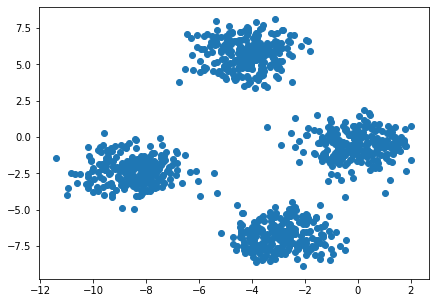

In [4]:
# plot data
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

<b> Create functions from scratch that allow you to call DBSCAN on a dataset </b>

In [5]:
# import package
import numpy as np

In [6]:
def scratch_DBSCAN(dataset, eps, min_pts): 

    # Create a label holder
    labels = [0]* dataset.shape[0] 

    C = 0 # Arbitrary starting "current cluster" ID

    for p in range(0, dataset.shape[0]):
        if not (labels[p] == 0): 
            continue
        neighbors = neighborhood_search(dataset, p, eps)
         
        if len(neighbors) < min_pts:
            labels[p] = -1
        else:
            C = C + 1
            neighbor_cluster(dataset, labels, p, neighbors, C, eps, min_pts)
    return labels

In [7]:
def neighbor_cluster(dataset, labels, p, neighbors, C, eps, min_pts):

    labels[p] = C # Assign the cluster label to original point 
     
    i = 0
    while i < len(neighbors):
        potential_neighbor_ix = neighbors[i]
        if labels[potential_neighbor_ix] == -1: 
            labels[potential_neighbor_ix] = C 
         
        elif labels[potential_neighbor_ix] == 0: 
            labels[potential_neighbor_ix] = C 
             
            potential_neighbors_cluster = neighborhood_search(dataset, potential_neighbor_ix, eps) 
             
            if len(potential_neighbors_cluster) >= min_pts: 
                neighbors = neighbors + potential_neighbors_cluster       
         
        i = i + 1

In [8]:
def neighborhood_search(dataset, p, eps): 
    neighbors = [] 
     
    for potential_neighbor in range(0, dataset.shape[0]): 
         
        if np.linalg.norm(dataset[p] - dataset[potential_neighbor]) < eps: 
            neighbors.append(potential_neighbor) 
             
    return neighbors

<b> Use your created DBSCAN implementation to find clusters in the generated dataset </b>

In [9]:
labels = scratch_DBSCAN(dataset=X, eps=0.6, min_pts=5)

In [10]:
# seeing labels
print(labels[0:10])

[1, 2, 2, 3, 4, 2, 2, 1, 3, 2]


<b> Visualize the clustering performance of your DBSCAN implementation from scratch </b>

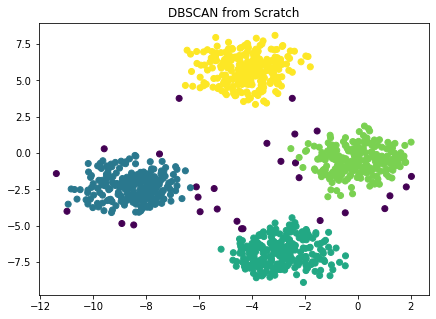

In [11]:
plt.figure(figsize=(7,5))
plt.title("DBSCAN from Scratch")
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

# Comparing DBSCAN with KMeans and Hierarchical Clustering

<b> Import the necessary packages </b>

In [12]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<b> Load the wine dataset and check what the data looks like </b>

In [13]:
wine = pd.read_csv('datasets/wine_data.csv')

In [14]:
wine.head()

,OD_read,Proline
0,3.92,1065.0
1,3.40,1050.0
2,3.17,1185.0
3,3.45,1480.0
4,2.93,735.0


<b> Visualize the data </b>

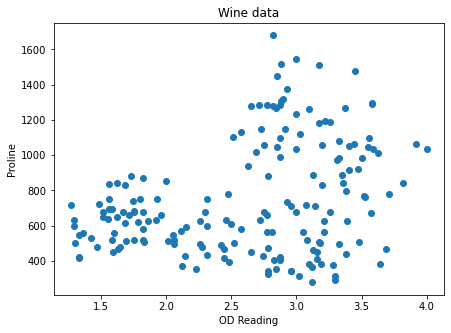

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(wine.iloc[:, 0], wine.iloc[:, 1])
plt.title('Wine data')
plt.xlabel('OD Reading')
plt.ylabel('Proline')
plt.show()

<b> Generate clusters using k-means, agglomerative clustering, and DBSCAN </b>

In [16]:
# instantiate KMeans
km = KMeans(3)
km_clusters = km.fit_predict(wine)

In [17]:
# instantiate Agglomerative Clustering
ac = AgglomerativeClustering(3, linkage='average')
ac_clusters = ac.fit_predict(wine)

<b> Evaluate a few different options for DSBSCAN hyperparameters and their effect on the silhouette score </b>

In [18]:
# instantiate DBSCAN
db_param_options = [[20,5],[25,5],[30,5],[25,7],[35,7],[40,5]]

for ep,min_sample in db_param_options:
    db = DBSCAN(eps=ep, min_samples = min_sample)
    db_clusters = db.fit_predict(wine)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(wine, db_clusters))

Eps:  20 Min Samples:  5
DBSCAN Clustering:  0.3997987919957757
Eps:  25 Min Samples:  5
DBSCAN Clustering:  0.35258611037074095
Eps:  30 Min Samples:  5
DBSCAN Clustering:  0.43763797761597306
Eps:  25 Min Samples:  7
DBSCAN Clustering:  0.2711660466706248
Eps:  35 Min Samples:  7
DBSCAN Clustering:  0.4600630149335495
Eps:  40 Min Samples:  5
DBSCAN Clustering:  0.5739675293567901


<b> Generate the final clusters based on the highest silhouette score </b>

In [19]:
# instantiate DBSCAN
db = DBSCAN(eps=40, min_samples=5)
db_clusters = db.fit_predict(wine)

<b> Visualize clusters generated using each of the three methods </b>

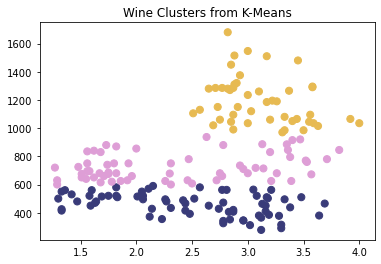

In [20]:
plt.title("Wine Clusters from K-Means")
plt.scatter(wine['OD_read'], wine['Proline'], c=km_clusters,s=50, cmap='tab20b')
plt.show()

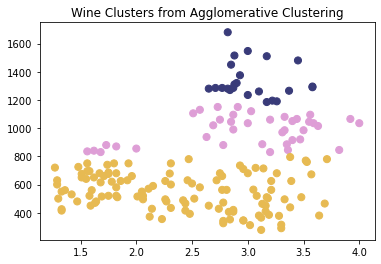

In [21]:
plt.title("Wine Clusters from Agglomerative Clustering")
plt.scatter(wine['OD_read'], wine['Proline'], c=ac_clusters,s=50, cmap='tab20b')
plt.show()

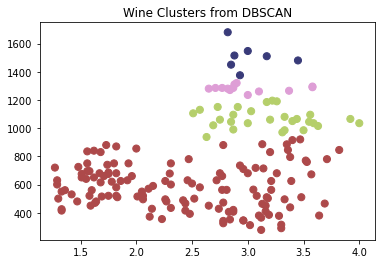

In [22]:
plt.title("Wine Clusters from DBSCAN")
plt.scatter(wine['OD_read'], wine['Proline'], c=db_clusters,s=50, cmap='tab20b')
plt.show()